In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/gurgaon_houses_and_flats_cleaned.csv', on_bad_lines = 'skip')

df.head()

In [ ]:
df.shape

(3709, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3709 non-null   object 
 1   society              3709 non-null   object 
 2   sector               3709 non-null   object 
 3   price_in_cr          3709 non-null   float64
 4   price_per_sqft       3709 non-null   int64  
 5   area_in_sq_ft        3709 non-null   float64
 6   areawithtype         3709 non-null   object 
 7   bedroom              3709 non-null   int64  
 8   bathroom             3709 non-null   int64  
 9   balcony              2850 non-null   object 
 10  floornum             3709 non-null   int64  
 11  facing               3709 non-null   object 
 12  agepossession        3709 non-null   object 
 13  super_built_up_area  1884 non-null   float64
 14  built_up_area        1720 non-null   float64
 15  carpet_area          1896 non-null   f

# 1.property type
- 77% of properties are flats & 23% are houses
- No missing values

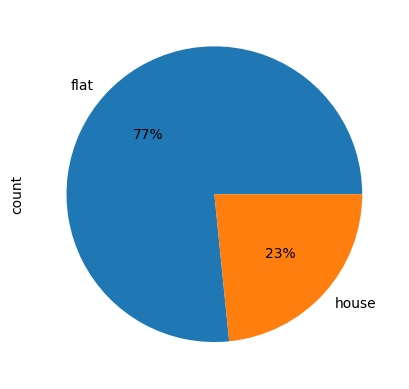

In [ ]:
df['property_type'].value_counts().plot(kind = 'pie', autopct = '%0.0f%%')
plt.show()

In [ ]:
df['property_type'].isnull().sum()

0

# 2.society
- There are 657 unique socieites
- 14% listed properties comes under Independent Category
- Frequncy Distribution of socities:
 - Extremely High (>100): 0 societies has more than 100 listings
 - Very High (80-100): 0 societies have between 80 and 100 listings
 - High (50-80): 2 societies have between 50 and 80 listings
 - Moderately High (30-50): 12 societies have between 30 and 50 listings
 - Average (10-30): 75 societies have between 10 and 30 listings
 - Low (5-10): 81 societies have between 5 and 10 listings
 - Very Low (1-5): 482 societies have between 1 and 5 listings

In [ ]:
df[df['society'] !='Independent']['society'].nunique() # 657 unique socieites

657

In [ ]:
np.round((df[df['society'] =='Independent'].shape[0]/df.shape[0])*100) # 14% listed properties comes under Independent Category

14.0

In [ ]:
society_counts = df[df['society'] != 'Independent']['society'].value_counts()

society_distribution = {
    'Extremely High (>100)': (society_counts > 100).sum(),
    'Very High (80-100)': ((society_counts > 80) & (society_counts <= 100)).sum(),
    'High (50-80)': ((society_counts >= 50) & (society_counts < 80)).sum(),
    'Moderately High (30-50)': ((society_counts >= 30) & (society_counts < 50)).sum(),
    'Average (10-30)': ((society_counts > 10) & (society_counts <= 30)).sum(),
    'Low (5-10)': ((society_counts >= 5) & (society_counts < 10)).sum(),
    'Very Low (1-5)': ((society_counts >= 1) & (society_counts < 5)).sum()
}

society_distribution

{'Extremely High (>100)': 0,
 'Very High (80-100)': 0,
 'High (50-80)': 2,
 'Moderately High (30-50)': 12,
 'Average (10-30)': 75,
 'Low (5-10)': 81,
 'Very Low (1-5)': 482}

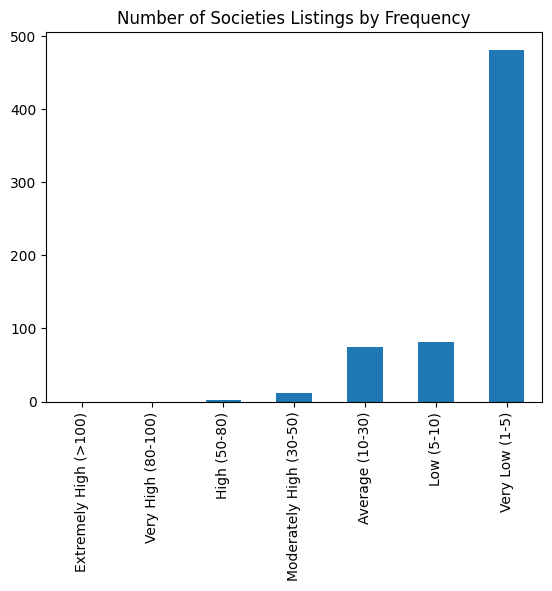

In [ ]:
pd.Series(society_distribution).plot(kind='bar', title='Number of Societies Listings by Frequency')
plt.show()

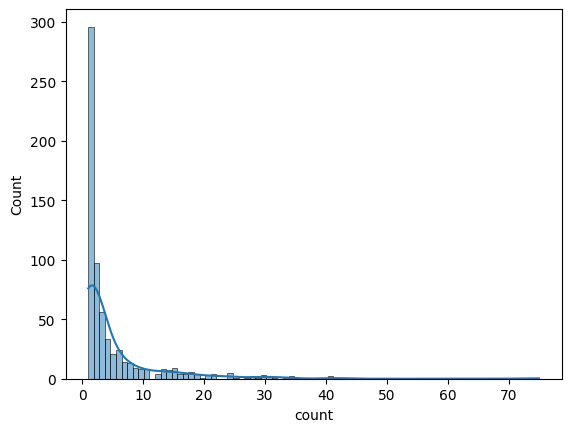

In [ ]:
sns.histplot(x = df[df['society'] != 'Independent']['society'].value_counts(), kde = True)
plt.show()

- Majority of the socities counts are from 1-5

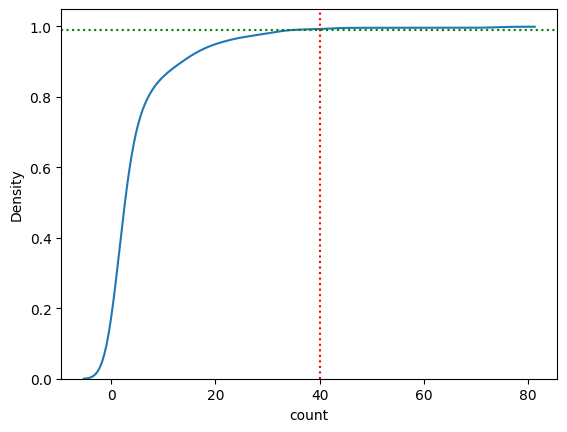

In [ ]:
sns.kdeplot(cumulative = True, x = df[df['society'] != 'Independent']['society'].value_counts())
plt.axvline(40, color = 'red', linestyle = 'dotted')
plt.axhline(0.99, color = 'green', linestyle ='dotted')
plt.show()

- 99% of the data comes under socities whose count <=40

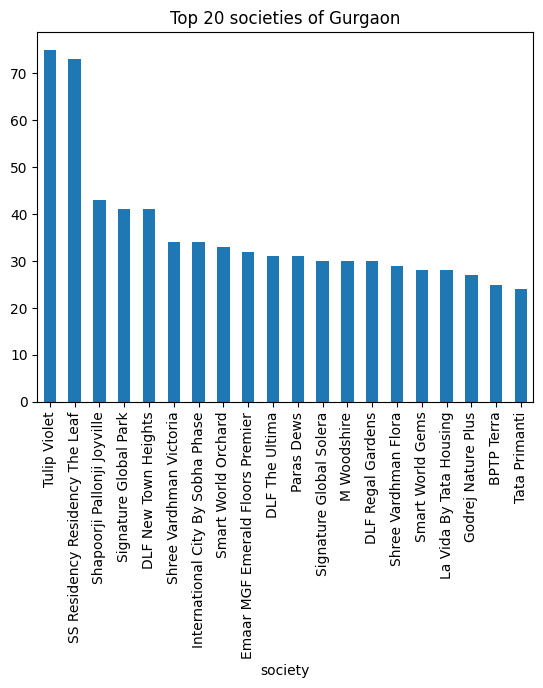

In [ ]:
mask = df[df['society'] !='Independent']['society'].value_counts()

mask.head(20).plot(kind = 'bar', title = 'Top 20 societies of Gurgaon')
plt.show()

#3.sector
- There are 148 unique sectors
- Frequency Distribution of sectors:
  - Extremely High (>100): 3 sectors have more than 100 listings
  - Very High (80-100): 6 sectors have between 80 and 100 listings
  - High (50-80): 18 sectors have between 50 and 80 listings
  - Moderately High (30-50): 19 sectors have between 30 and 50 listings
  - Average (10-30): 42 sectors have between 10 and 30 listings
  - Low (5-10): 18 sectors have between 5 and 10 listings
  - Very Low (1-5): 42 sectors have between 1 and 5 listings

In [ ]:
df['sector'].nunique()

148

In [ ]:
sector_counts = df['sector'].value_counts()

sector_distribution = {
    'Extremely High (>100)': (sector_counts > 100).sum(),
    'Very High (80-100)': ((sector_counts > 80) & (sector_counts <= 100)).sum(),
    'High (50-80)': ((sector_counts >= 50) & (sector_counts < 80)).sum(),
    'Moderately High (30-50)': ((sector_counts >= 30) & (sector_counts < 50)).sum(),
    'Average (10-30)': ((sector_counts > 10) & (sector_counts <= 30)).sum(),
    'Low (5-10)': ((sector_counts >= 5) & (sector_counts < 10)).sum(),
    'Very Low (1-5)': ((sector_counts >= 1) & (sector_counts < 5)).sum()
}

sector_distribution


{'Extremely High (>100)': 3,
 'Very High (80-100)': 6,
 'High (50-80)': 18,
 'Moderately High (30-50)': 19,
 'Average (10-30)': 42,
 'Low (5-10)': 18,
 'Very Low (1-5)': 42}

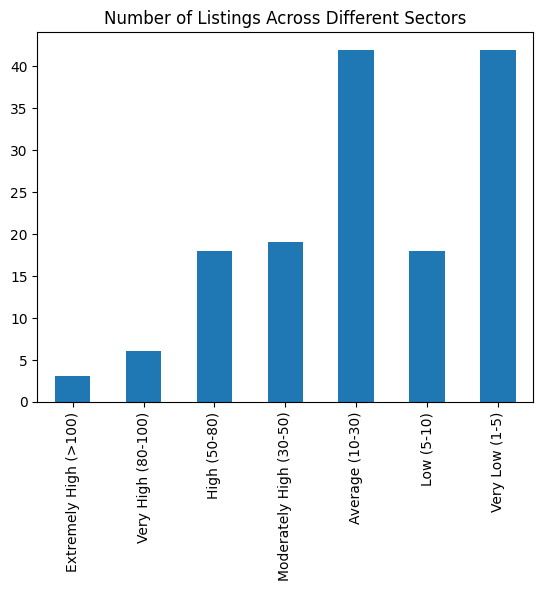

In [ ]:
pd.Series(sector_distribution).plot(kind='bar', title='Number of Listings Across Different Sectors')
plt.show()

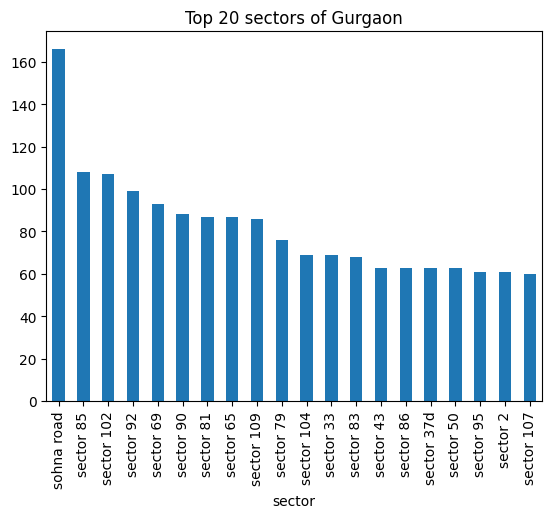

In [ ]:
mask = df['sector'].value_counts().head(20)

mask.head(20).plot(kind = 'bar', title = 'Top 20 sectors of Gurgaon')
plt.show()

#4.price

In [ ]:
df['price_in_cr'].isnull().sum()

0

In [ ]:
df['price_in_cr'].describe()

,price_in_cr
count,3709.000000
mean,2.495500
std,2.935106
min,0.080000
25%,0.940000
50%,1.510000
75%,2.700000
max,31.500000


**Descriptive Statistics:**
- **Count:** There are 3,709 property listings in the dataset.
- **Mean Price:** The average property price is approximately 2.5 crore.
- **Median Price (50th Percentile):** The middle point of the dataset shows a property price of 1.51 crore.
- **Standard Deviation:** The price shows significant variation with a standard deviation of ₹2.94 crore, indicating a wide range of property prices.
- **Range**: Prices range from a minimum of 0.08 crores to a maximum of 31.5 crores.
- **25th Percentile (Q1):** 25% of the properties are priced below 0.94 crore.

- **75th Percentile (Q3):** 75% of properties are priced below 2.7 crore.

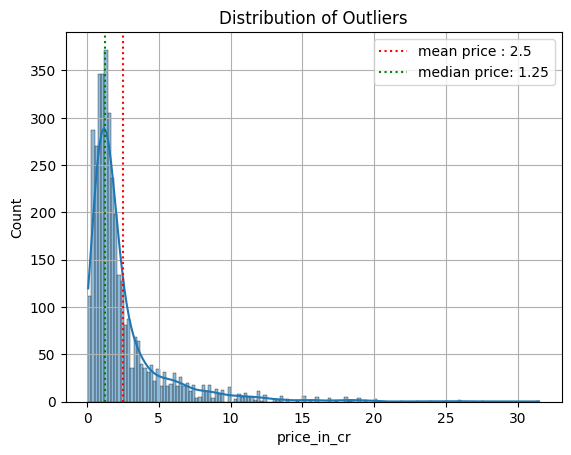

In [ ]:
sns.histplot(df['price_in_cr'], kde = True)
plt.axvline(df['price_in_cr'].mean(), color = 'red', linestyle = 'dotted', label = f"mean price : {np.round(df['price_in_cr'].mean(),2)}")
plt.axvline(df['price_in_cr'].mode()[0], color = 'green', linestyle = 'dotted', label = f"median price: {np.round(df['price_in_cr'].mode()[0],2)}")
plt.title('Distribution of Outliers')
plt.legend()
plt.grid()
plt.show()

- The histogram indicates that most properties are priced in the range (below 5 crores), with a few properties going beyond 10 crores.

In [ ]:
px.box(x = df['price_in_cr'], title = 'Box plot of Price')

- Box Plot: The box plot showcases the spread of the data and potential outliers.
- Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

In [ ]:
df['price_in_cr'].describe()

,price_in_cr
count,3709.000000
mean,2.495500
std,2.935106
min,0.080000
25%,0.940000
50%,1.510000
75%,2.700000
max,31.500000


In [ ]:
df['price_in_cr'].isnull().sum()

0

In [ ]:
skewness = df['price_in_cr'].skew()
kurtosis = df['price_in_cr'].kurt()

print(skewness,kurtosis)

3.358370604879532 15.769086064354468


- No Missing Values
- Price follows Log Normal Distribution
- The Kurtosis value is approximately 15.76. A kurtosis value greater than 3 indicates a distribution with heavier tails which means high density of outliers compared to a normal distribution

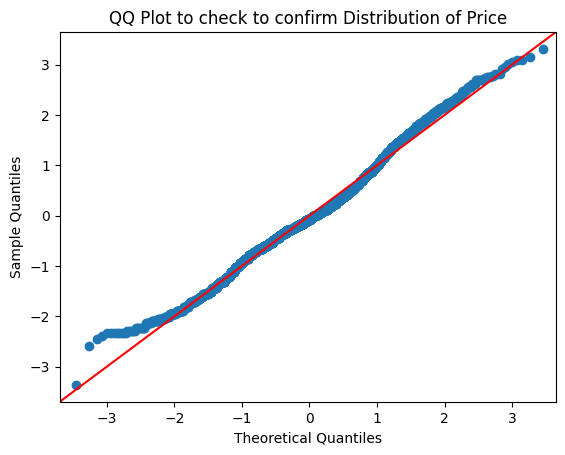

In [ ]:
import statsmodels.api as sm

x = np.log(df['price_in_cr'])

sm.qqplot(x, fit = True, line = '45')
plt.title('QQ Plot to check to confirm Distribution of Price')
plt.show()

In [ ]:
# Quantile Analysis

quantiles = df['price_in_cr'].quantile([0.01, 0.05, 0.1, 0.5, 0.95, 0.99])

In [ ]:
quantiles

,price_in_cr
0.01,0.250
0.05,0.370
0.10,0.500
0.50,1.510
0.95,8.400
0.99,15.092



Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 10% Quantile: 10% of properties are priced below 0.5 crores.
- 50% Quantile: 50% of properties are priced below 1.51 crores.
- 95% Quantile: 95% of properties are priced below 8.4 crores.
- 99% Quantile: 99% of properties are priced below 15 crores, indicating that very few properties are priced above this value.

In [ ]:
# Potential Ouliers using IQR Method

Q3 = df['price_in_cr'].quantile(0.75)
Q1 = df['price_in_cr'].quantile(0.25)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7000000000000006 5.340000000000001


In [ ]:
outliers = df[(df['price_in_cr'] < lower_bound) | (df['price_in_cr'] > upper_bound)]

outliers.shape[0]


419

In [ ]:
outliers['price_in_cr'].describe()

,price_in_cr
count,419.000000
mean,9.169881
std,4.091208
min,5.350000
25%,6.300000
50%,8.000000
75%,10.550000
max,31.500000


Analysis on Outliers:

- Based on the IQR method, there are 419 properties considered as outliers.
- These outliers have an average price of approximately 9.17 crores.
- The range for these outliers is from 5.35 crores to 31.5 crores.

In [ ]:
np.round(outliers['price_in_cr'].mode()[0],2)

5.5

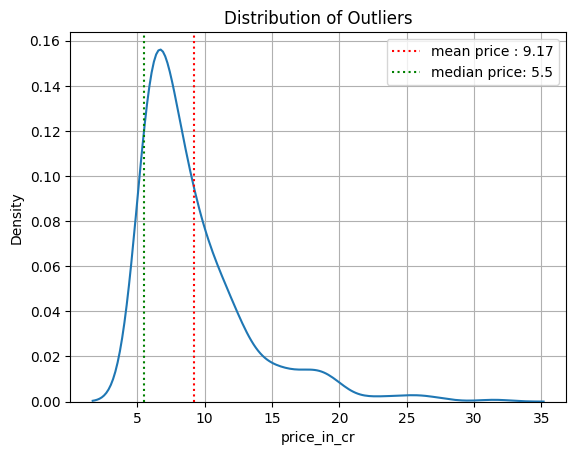

In [ ]:
sns.kdeplot(outliers['price_in_cr'])

plt.axvline(outliers['price_in_cr'].mean(), color = 'red', linestyle = 'dotted', label = f"mean price : {np.round(outliers['price_in_cr'].mean(),2)}")
plt.axvline(outliers['price_in_cr'].mode()[0], color = 'green', linestyle = 'dotted', label = f"median price: {np.round(outliers['price_in_cr'].mode()[0],2)}")

plt.title('Distribution of Outliers')
plt.legend()
plt.grid()
plt.show()


In [ ]:
outliers['price_in_cr'].skew()

1.9989933758977247

In [ ]:
px.box(x = outliers['price_in_cr'], title = 'Box plot of Outliers')

# Property price > 16 are considered as extreme outliers
# We have to check it manually that whether we should remove them or not

In [ ]:
count_0_1 = df[(df['price_in_cr'] >= 0) & (df['price_in_cr'] < 1)].shape[0]
count_1_2 = df[(df['price_in_cr'] >= 1) & (df['price_in_cr'] < 2)].shape[0]
count_2_3 = df[(df['price_in_cr'] >= 2) & (df['price_in_cr'] < 3)].shape[0]
count_3_5 = df[(df['price_in_cr'] >= 3) & (df['price_in_cr'] < 5)].shape[0]
count_5_10 = df[(df['price_in_cr'] >= 5) & (df['price_in_cr'] < 10)].shape[0]
count_10_20 = df[(df['price_in_cr'] >= 10) & (df['price_in_cr'] < 20)].shape[0]
count_20_40 = df[(df['price_in_cr'] >= 20) & (df['price_in_cr'] < 40)].shape[0]

price_distribution = {
    '0-1 crore': count_0_1,
    '1-2 crore': count_1_2,
    '2-3 crore': count_2_3,
    '3-5 crore': count_3_5,
    '5-10 crore': count_5_10,
    '10-20 crore': count_10_20,
    '20-40 crore': count_20_40
}

price_distribution


{'0-1 crore': 1026,
 '1-2 crore': 1328,
 '2-3 crore': 522,
 '3-5 crore': 371,
 '5-10 crore': 338,
 '10-20 crore': 113,
 '20-40 crore': 11}

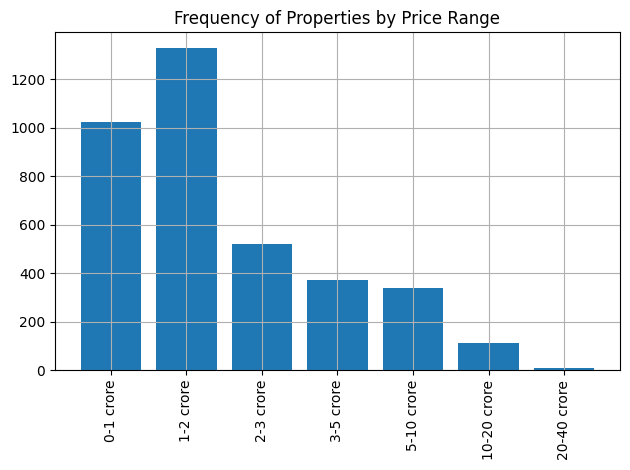

In [ ]:
plt.bar(price_distribution.keys(), price_distribution.values())

plt.title('Frequency of Properties by Price Range')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid()
plt.show()

- The majority of properties are priced in the "0-2 crores"
- There's a significant drop in the number of properties priced above "2 crores.

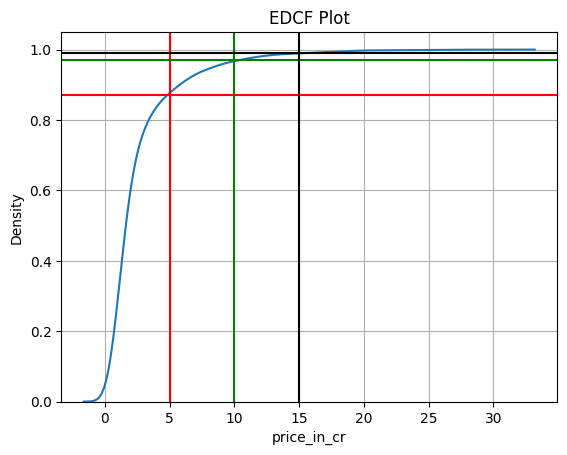

In [ ]:
sns.kdeplot(df['price_in_cr'], cumulative = True)
plt.axhline(0.87, color = 'red')
plt.axvline(5, color = 'red')

plt.axhline(0.97, color = 'green')
plt.axvline(10, color = 'green')

plt.axhline(0.99, color = 'black')
plt.axvline(15, color = 'black')

plt.title('EDCF Plot')
plt.grid()
plt.show()

- Approx 87% of the properties prices comes under 5 crores
- Approx 97% of the properties prices comes under 10 crores
- Approx 99% of the properties prices comes under 15 crores
- Around 3% of the properties prices comes under outliers

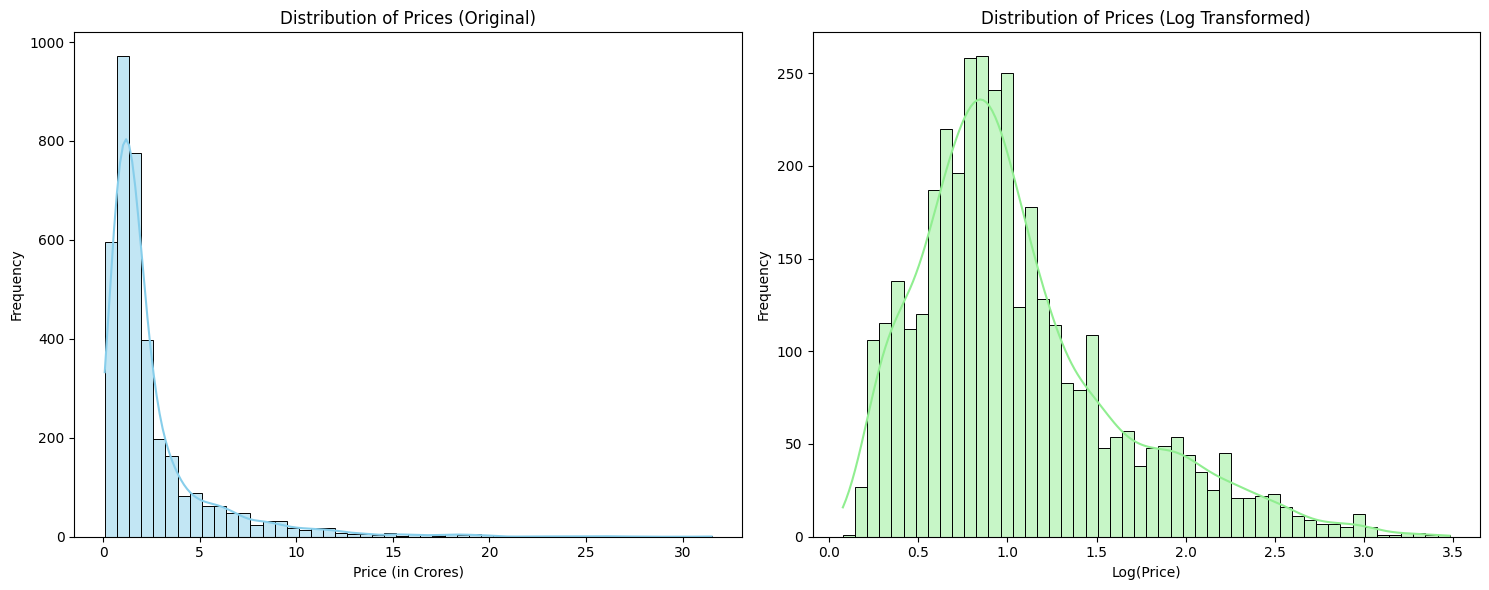

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Distribution plot without log transformation
sns.histplot(df['price_in_cr'], kde=True, bins=50, color='skyblue', ax=ax1)
ax1.set_title('Distribution of Prices (Original)')
ax1.set_xlabel('Price (in Crores)')
ax1.set_ylabel('Frequency')

# Distribution plot with log transformation
sns.histplot(np.log1p(df['price_in_cr']), kde=True, bins=50, color='lightgreen', ax=ax2)
ax2.set_title('Distribution of Prices (Log Transformed)')
ax2.set_xlabel('Log(Price)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# to improve results of algo. like Linear Regression you can use log tranformation

- np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

- Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

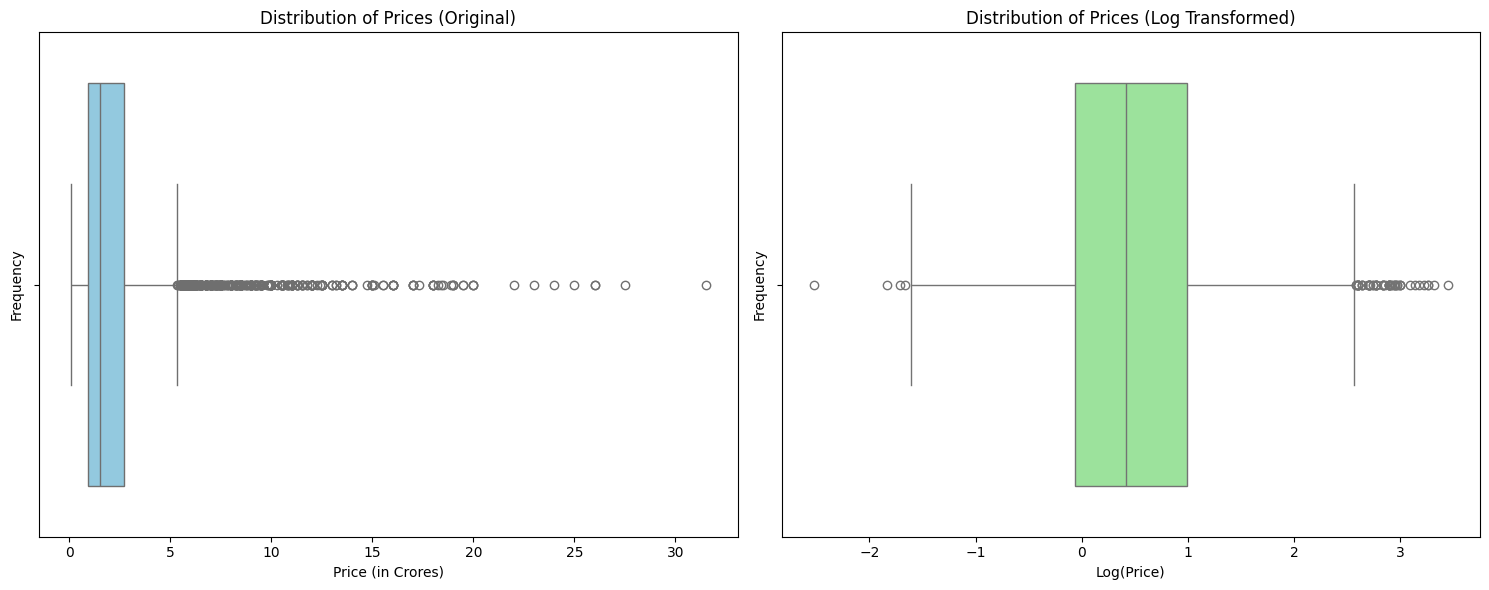

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 6))

# Distribution plot without log transformation
sns.boxplot(x = df['price_in_cr'], color='skyblue', ax = ax1)
ax1.set_title('Distribution of Prices (Original)')
ax1.set_xlabel('Price (in Crores)')
ax1.set_ylabel('Frequency')

# Distribution plot with log transformation
sns.boxplot(x = np.log(df['price_in_cr']), color='lightgreen', ax = ax2)
ax2.set_title('Distribution of Prices (Log Transformed)')
ax2.set_xlabel('Log(Price)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
skewness = df['price_in_cr'].skew()
kurtosis = df['price_in_cr'].kurt()
print(skewness,kurtosis)

3.358370604879532 15.769086064354468


In [ ]:
skewness = np.log1p(df['price_in_cr']).skew()
kurtosis = np.log1p(df['price_in_cr']).kurt()

print(skewness,kurtosis)

1.08128636775953 1.0346792855630276


# 5.price_per_sqft

In [ ]:
df['price_per_sqft'].isnull().sum()

0

In [ ]:
df['price_per_sqft'].describe()

,price_per_sqft
count,3709.000000
mean,13817.641413
std,22817.031140
min,4.000000
25%,6812.000000
50%,9007.000000
75%,13769.000000
max,600000.000000


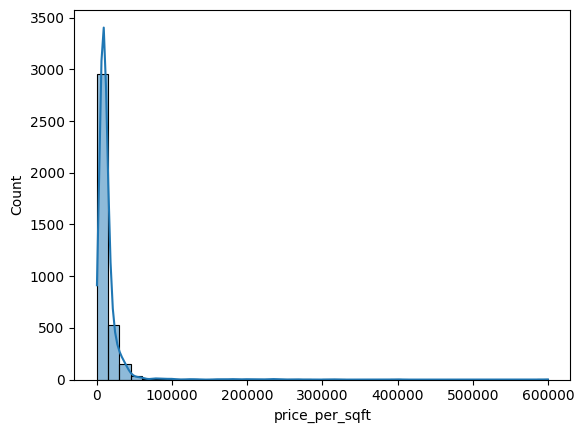

In [ ]:
sns.histplot(df[~df['price_per_sqft'] <= 5000]['price_per_sqft'] , bins = 40, kde = True)
plt.show()

# right skwed data

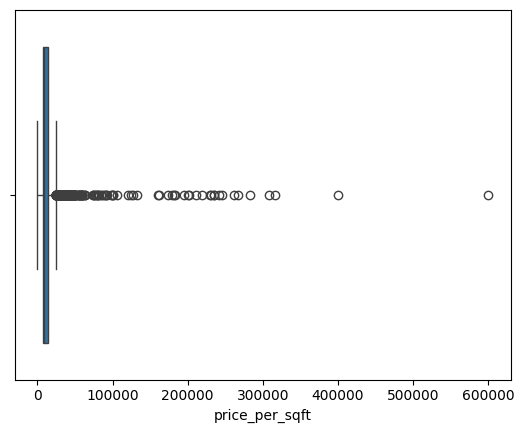

In [ ]:
sns.boxplot(x = df[~df['price_per_sqft'] <= 5000]['price_per_sqft'])
plt.show()

In [ ]:
skewness = df['price_per_sqft'].skew()
kurtosis = df['price_per_sqft'].kurt()

print(skewness, kurtosis)

11.500134647032853 192.47633335662877


## Observations-
- Outliers
- Right Skewed
- No missing values
- The Kurtosis value is approximately 192. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution
- The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers
- Potenial Data Errors are present in it . Need to fix them

In [ ]:
df[df['price_per_sqft'] <= 1000].shape # Potential Data Errors

(16, 23)

# 6.area_in_sqft

In [ ]:
df['area_in_sq_ft'].describe()

,area_in_sq_ft
count,3709.000000
mean,2650.454054
std,20414.678543
min,53.819500
25%,1211.000000
50%,1720.000000
75%,2290.000000
max,875000.000000


In [ ]:
df[df['area_in_sq_ft'] <= 100].shape # Potential Errors

(22, 23)

# 6.bedroom

In [ ]:
df['bedroom'].isnull().sum()

0

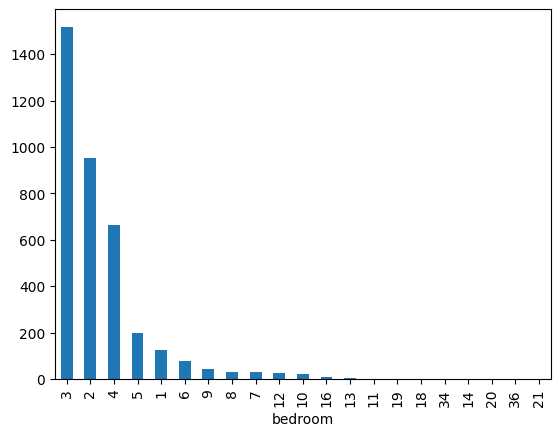

In [ ]:
df['bedroom'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
temp = df['bedroom'].value_counts()

fig = px.pie(temp, values = temp.values, names = temp.index, hover_name = temp.index)

fig.show()


# 7.bathroom

In [ ]:
df['bathroom'].isnull().sum()

0

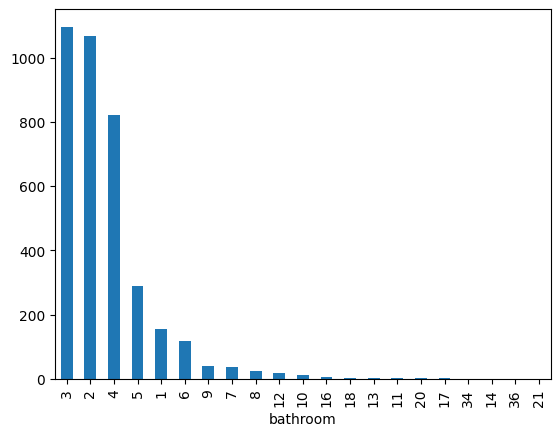

In [ ]:
df['bathroom'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
temp = df['bathroom'].value_counts()

fig = px.pie(temp, values = temp.values, names = temp.index, hover_name = temp.index)
fig.show()


# 8.balcony

In [ ]:
df['balcony'].value_counts()

,count
balcony,
3,938
3+,831
2,701
1,292
0,88


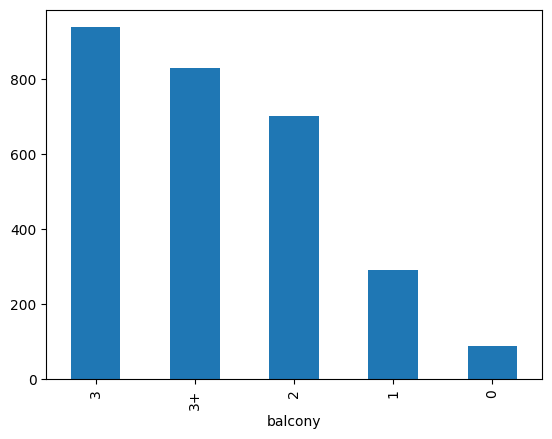

In [ ]:
df['balcony'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
temp = df['balcony'].value_counts()

fig = px.pie(temp, values = temp.values, names = temp.index, hover_name = temp.index)
fig.show()


# 9.floornum

In [ ]:
df['floornum'].isnull().sum()

0

In [ ]:
np.round(df['floornum'].describe())

,floornum
count,3709.0
mean,7.0
std,6.0
min,-1.0
25%,2.0
50%,5.0
75%,10.0
max,51.0


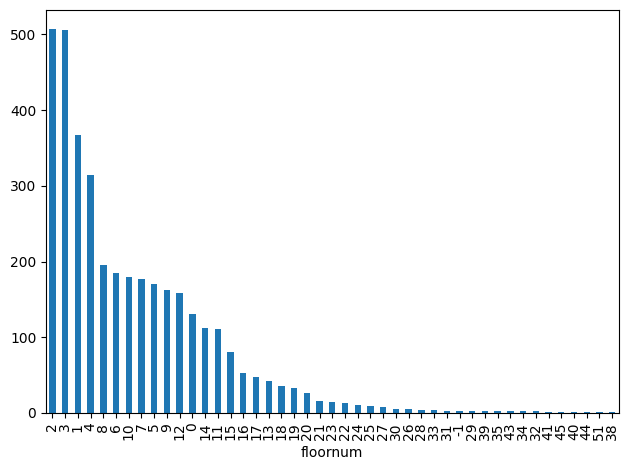

In [ ]:
df['floornum'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
px.box(df, y = 'floornum')

- The majority of the properties lie between the ground floor (0) and the 23th floor.
- Floors 1 to 4 are particularly common, with the 2nd & 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors.
- The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

# 10.facing

In [ ]:
df['facing'].isnull().sum()

0

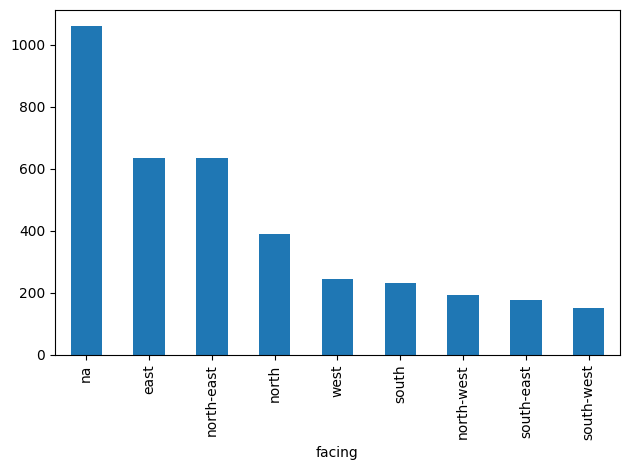

In [ ]:
df['facing'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
temp = df['facing'].value_counts()

fig = px.pie(temp, values = temp.values, names = temp.index, hover_name = temp.index)
fig.show()


# 11.ageposession

In [ ]:
df['agepossession'].value_counts()

,count
agepossession,
Relatively New,1646
New Property,737
Moderately Old,566
Undefined,410
Old,308
Under Construction,42


# 12.super_built_up_area

In [ ]:
df['super_built_up_area'].isnull().sum()

1825

In [ ]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1884.000000
mean,1919.479575
std,764.879978
min,145.000000
25%,1468.750000
50%,1827.000000
75%,2215.000000
max,10000.000000


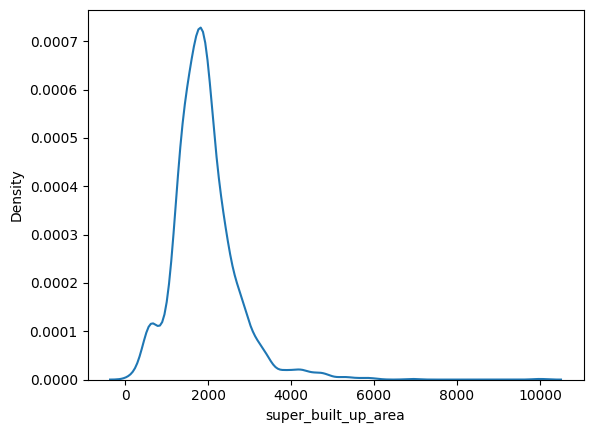

In [ ]:
sns.kdeplot(df['super_built_up_area'])
plt.show()

In [ ]:
px.histogram(df.dropna(), x = 'super_built_up_area', nbins = 30)

In [ ]:
px.box(df, y = 'super_built_up_area')

- Most properties have a super built-up area ranging between approximately 1,200 sq.ft and 2500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,467 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

# 13.built_up_area

In [ ]:
df['built_up_area'].isnull().sum()

1989

In [ ]:
df[~(df['built_up_area'] == df['built_up_area'].max())]['built_up_area'].describe()


,built_up_area
count,1719.000000
mean,2027.615159
std,1445.783445
min,2.000000
25%,1186.000000
50%,1700.000000
75%,2434.968000
max,13527.600000


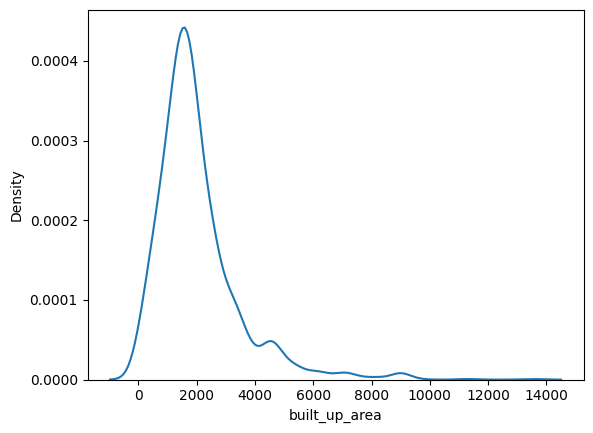

In [ ]:
sns.kdeplot(df[~(df['built_up_area'] == df['built_up_area'].max())]['built_up_area'])
plt.show()


In [ ]:
px.histogram(df[~(df['built_up_area'] == df['built_up_area'].max())].dropna(), x = 'built_up_area', nbins = 40)

In [ ]:
px.box(df[~(df['built_up_area'] == df['built_up_area'].max())], y = 'built_up_area')



- Most properties have a built-up area ranging roughly between 1000 sq.ft and 2,400 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side.
- The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
- The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors.
- This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

# 14.carpet_area

In [ ]:
df['carpet_area'].isnull().sum()

1813

In [ ]:
df['carpet_area'].describe()

,carpet_area
count,1896.000000
mean,2212.415886
std,18539.343311
min,15.000000
25%,830.000000
50%,1297.500000
75%,1786.250000
max,607936.000000


In [ ]:
px.box(df, x = 'carpet_area')


In [ ]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_cr', 'price_per_sqft',
       'area_in_sq_ft', 'areawithtype', 'bedroom', 'bathroom', 'balcony',
       'floornum', 'facing', 'agepossession', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'study room', 'servant room',
       'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

# 15.additonal_room

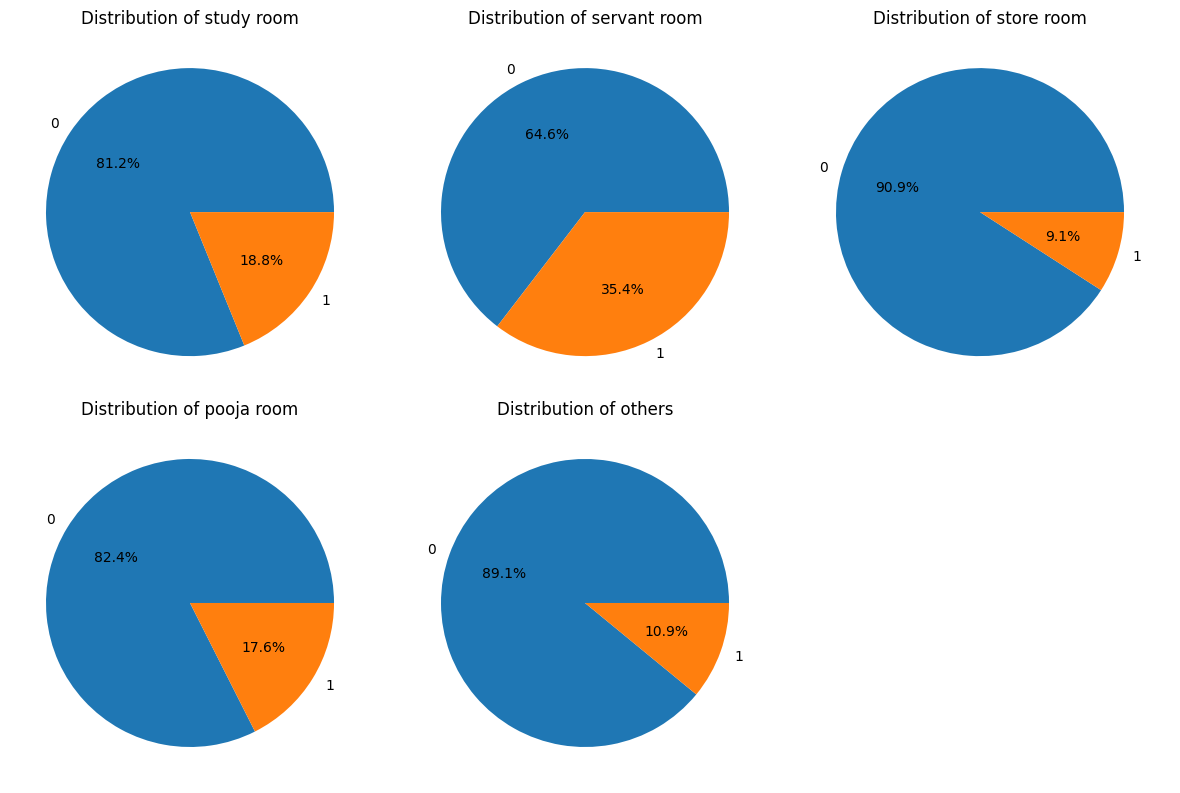

In [ ]:
additional_rooms = ['study room', 'servant room', 'store room', 'pooja room', 'others']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axes = axes.flatten()

for idx, i in enumerate(additional_rooms):

    df[i].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[idx], legend=False)
    axes[idx].set_title(f'Distribution of {i}')
    axes[idx].set_ylabel('')


axes[5].axis('off')
plt.tight_layout()
plt.show()


 # 16.furnishing_type

In [ ]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
1,2467
0,1042
2,200


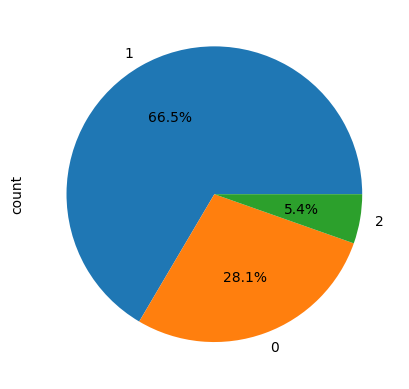

In [ ]:
df['furnishing_type'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

# 17.luxury_score

In [ ]:
df['luxury_score'].isnull().sum()

0

In [ ]:
df['luxury_score'].describe()

,luxury_score
count,3709.000000
mean,70.584255
std,53.376578
min,0.000000
25%,30.000000
50%,58.000000
75%,109.000000
max,174.000000


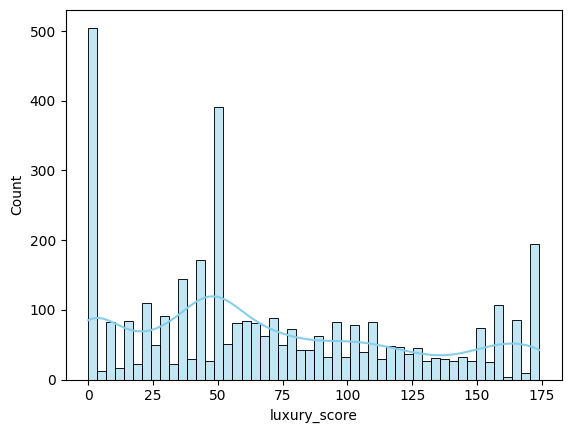

In [ ]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)
plt.show()

<Axes: xlabel='luxury_score', ylabel='Density'>

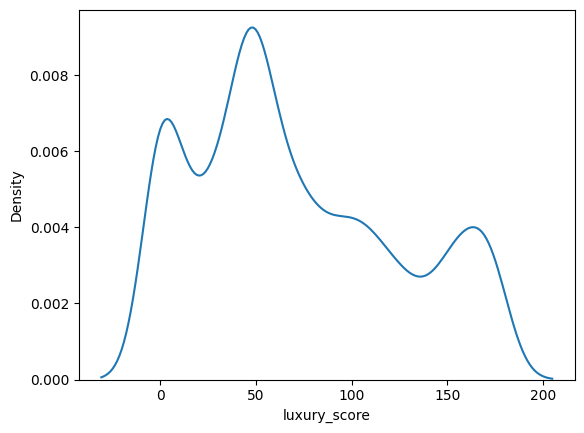

In [ ]:
sns.kdeplot(df['luxury_score'])

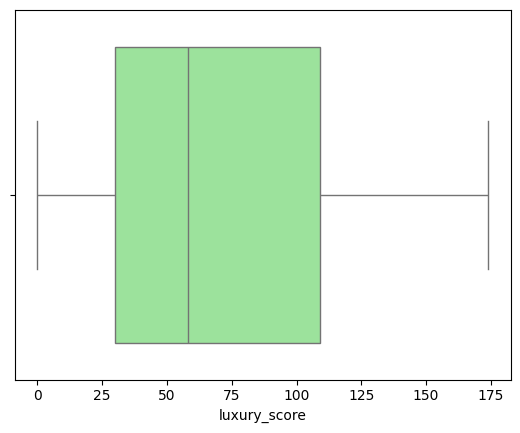

In [ ]:
sns.boxplot(x = df['luxury_score'], color='lightgreen')
plt.show()

- The luxury score distribution has multiple peaks, suggesting a multi-modal distribution.
- There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 150-175 range.

- The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.